# Muthu Palaniappan M - 21011101079

### In this white box neural network implementation. 
#### - Two Layer  architecture 
#### - Dataset used MNIST digits recognizer
#### - ReLU activation function
#### - softmax activation function

### **Importing Packages**

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

### Reading Training Dataset

In [2]:
data = pd.read_csv('train.csv')      #train.csv file - Muthu_NN_Whitebox/Dataset ---Location

### Processing Data

In [3]:
data = np.array(data) # we are converting pandas dataframe to np array for easier computation
m, n = data.shape    # m - number of records n - number of fields
np.random.shuffle(data) # shuffle before splitting into dev and training sets

#### Splitting dataset into developement and training

#### Developement set

In [4]:
data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

#### Training set

In [5]:
data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

##### Our NN will have a simple two-layer architecture. Input layer $a^{[0]}$ will have 784 units corresponding to the 784 pixels in each 28x28 input image. A hidden layer $a^{[1]}$ will have 10 units with ReLU activation, and finally our output layer $a^{[2]}$ will have 10 units corresponding to the ten digit classes with softmax activation.


**Forward propagation**

$$Z^{[1]} = W^{[1]} X + b^{[1]}$$
$$A^{[1]} = g_{\text{ReLU}}(Z^{[1]}))$$
$$Z^{[2]} = W^{[2]} A^{[1]} + b^{[2]}$$
$$A^{[2]} = g_{\text{softmax}}(Z^{[2]})$$

**Backward propagation**

$$dZ^{[2]} = A^{[2]} - Y$$
$$dW^{[2]} = \frac{1}{m} dZ^{[2]} A^{[1]T}$$
$$dB^{[2]} = \frac{1}{m} \Sigma {dZ^{[2]}}$$
$$dZ^{[1]} = W^{[2]T} dZ^{[2]} .* g^{[1]\prime} (z^{[1]})$$
$$dW^{[1]} = \frac{1}{m} dZ^{[1]} A^{[0]T}$$
$$dB^{[1]} = \frac{1}{m} \Sigma {dZ^{[1]}}$$

**Parameter updates**

$$W^{[2]} := W^{[2]} - \alpha dW^{[2]}$$
$$b^{[2]} := b^{[2]} - \alpha db^{[2]}$$
$$W^{[1]} := W^{[1]} - \alpha dW^{[1]}$$
$$b^{[1]} := b^{[1]} - \alpha db^{[1]}$$

**Vars and shapes**

Forward prop

- $A^{[0]} = X$: 784 x m
- $Z^{[1]} \sim A^{[1]}$: 10 x m
- $W^{[1]}$: 10 x 784 (as $W^{[1]} A^{[0]} \sim Z^{[1]}$)
- $B^{[1]}$: 10 x 1
- $Z^{[2]} \sim A^{[2]}$: 10 x m
- $W^{[1]}$: 10 x 10 (as $W^{[2]} A^{[1]} \sim Z^{[2]}$)
- $B^{[2]}$: 10 x 1

Backprop

- $dZ^{[2]}$: 10 x m ($~A^{[2]}$)
- $dW^{[2]}$: 10 x 10
- $dB^{[2]}$: 10 x 1
- $dZ^{[1]}$: 10 x m ($~A^{[1]}$)
- $dW^{[1]}$: 10 x 10
- $dB^{[1]}$: 10 x 1

#### init parameters

In [6]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

#### ReLU activation Function

##### f(x) = max(0,x)

#####  If the function receives any negative input, it returns 0; however, if the function receives any positive value x, it returns that value. As a result, the output has a range of 0 to infinite.

In [7]:
def ReLU(Z):
    return np.maximum(Z, 0)

##### softmax activation Function

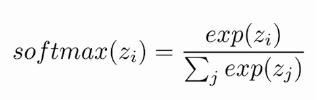

In [8]:
def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

##### Z represents the values from the neurons of the output layer. The exponential acts as the non-linear function. Later these values are divided by the sum of exponential values in order to normalize and then convert them into probabilities.

### Forward Propagation

In [9]:
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

##### ReLU derivative

In [10]:
def ReLU_deriv(Z):
    return Z > 0

##### One-Hot Encoding

In [11]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

### Backward Propagation

In [12]:
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

#### Updating Parameters

In [13]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

#### Getting Predictions and Accuracy

In [14]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

#### Gradient Descent

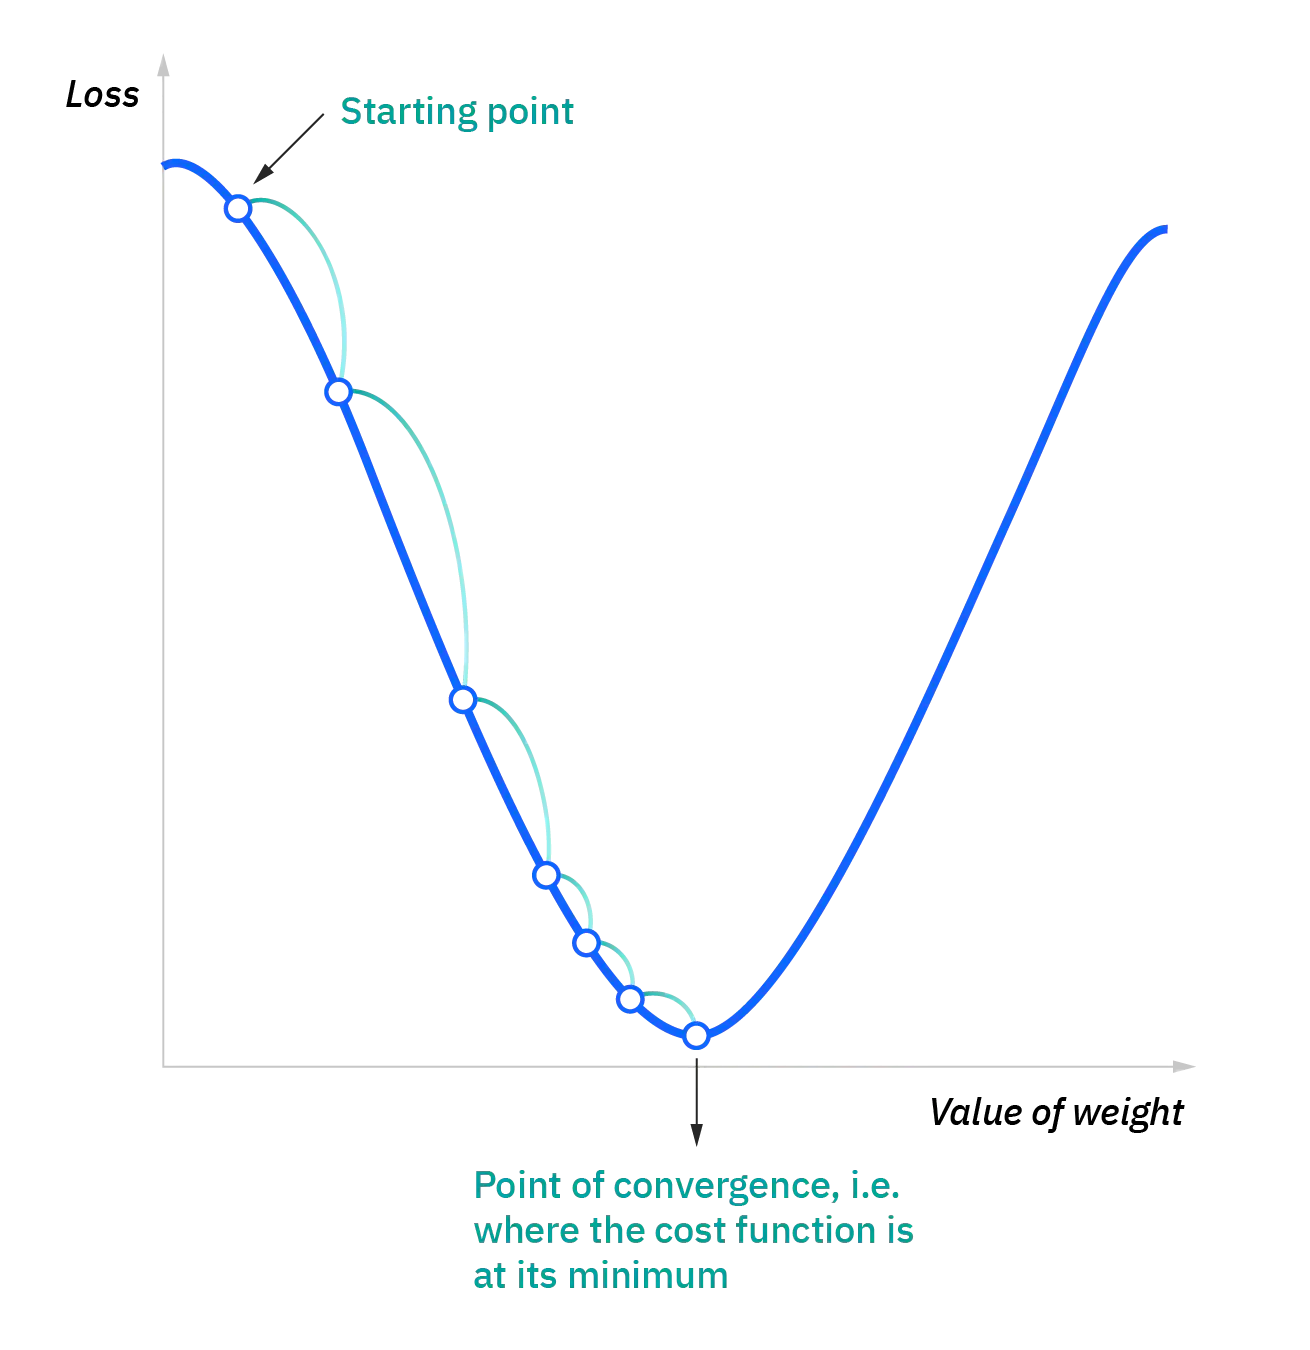

In [15]:
def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

### Getting Weights and Bias

In [16]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[1 2 5 ... 7 1 1] [9 1 8 ... 3 0 1]
0.09707317073170732
Iteration:  10
[7 6 5 ... 9 1 1] [9 1 8 ... 3 0 1]
0.15004878048780487
Iteration:  20
[7 6 5 ... 9 0 1] [9 1 8 ... 3 0 1]
0.2023658536585366
Iteration:  30
[7 6 5 ... 9 0 1] [9 1 8 ... 3 0 1]
0.26946341463414636
Iteration:  40
[7 6 5 ... 9 0 1] [9 1 8 ... 3 0 1]
0.30929268292682927
Iteration:  50
[7 6 5 ... 9 0 1] [9 1 8 ... 3 0 1]
0.3417804878048781
Iteration:  60
[7 6 5 ... 9 0 1] [9 1 8 ... 3 0 1]
0.37734146341463415
Iteration:  70
[7 1 5 ... 9 0 1] [9 1 8 ... 3 0 1]
0.416390243902439
Iteration:  80
[7 1 5 ... 9 0 1] [9 1 8 ... 3 0 1]
0.45170731707317074
Iteration:  90
[9 1 5 ... 9 0 4] [9 1 8 ... 3 0 1]
0.4844390243902439
Iteration:  100
[9 1 5 ... 9 0 4] [9 1 8 ... 3 0 1]
0.5170731707317073
Iteration:  110
[9 1 5 ... 9 0 1] [9 1 8 ... 3 0 1]
0.5590487804878049
Iteration:  120
[9 1 5 ... 9 0 1] [9 1 8 ... 3 0 1]
0.5984146341463414
Iteration:  130
[9 1 5 ... 9 0 1] [9 1 8 ... 3 0 1]
0.623390243902439
Iteration:  1

~85% accuracy on training set.

### Making Predicitions

In [21]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

### Testing Predictions

In [22]:
def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

## Let's look at a couple of examples:

Prediction:  [9]
Label:  9


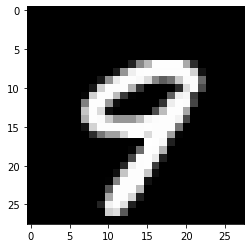

Prediction:  [1]
Label:  1


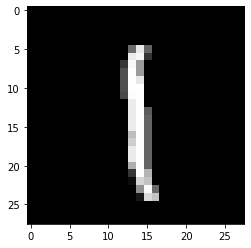

Prediction:  [8]
Label:  8


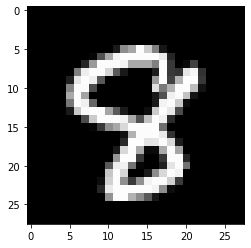

Prediction:  [1]
Label:  1


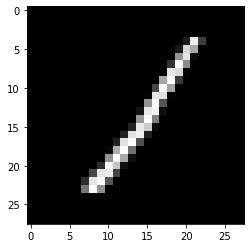

In [23]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

### Accuracy

In [24]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[6 4 1 4 7 9 4 3 6 6 8 6 7 8 0 5 0 4 4 5 1 6 2 8 8 5 4 0 7 2 4 5 2 4 3 6 6
 6 2 1 1 5 1 8 7 8 4 7 3 4 8 2 0 3 9 6 2 0 0 7 0 8 6 4 5 9 4 3 1 6 0 1 9 7
 1 9 3 5 5 1 8 4 8 2 0 5 0 1 0 2 8 5 7 6 9 2 6 4 2 7 6 8 7 9 9 9 8 6 2 1 5
 6 2 0 0 3 1 4 4 2 3 5 1 4 6 3 9 8 6 8 4 5 0 7 9 9 1 3 0 9 6 1 5 6 4 3 7 4
 3 4 6 7 1 8 3 7 5 5 8 0 1 7 0 3 7 1 4 0 3 2 1 1 2 6 1 1 2 2 2 3 6 7 9 8 9
 1 2 2 3 6 6 3 1 3 3 4 7 6 0 8 5 3 3 3 1 7 3 0 0 3 2 7 9 2 5 6 8 5 5 6 9 4
 5 5 5 5 9 1 6 4 8 8 6 6 1 6 9 3 3 1 9 0 2 9 6 8 0 4 5 8 0 6 4 7 9 1 5 3 8
 3 0 7 4 6 8 7 5 4 1 9 0 1 7 9 7 1 3 4 6 5 8 3 6 2 6 6 7 1 3 1 6 8 1 6 8 8
 2 2 7 7 3 6 0 2 0 8 0 0 0 5 6 0 6 1 0 6 8 6 9 1 3 1 9 7 0 5 9 7 2 0 0 8 8
 9 4 4 6 4 3 8 6 7 6 8 2 0 9 2 4 9 0 3 5 5 7 2 1 3 4 9 5 9 9 4 7 8 7 3 6 6
 9 7 1 4 7 1 2 1 1 9 1 8 2 8 8 1 1 5 9 8 4 6 2 3 1 4 2 6 8 4 8 5 2 2 8 4 9
 1 2 2 3 7 6 3 3 3 7 2 0 6 4 6 1 9 2 2 6 2 1 2 3 1 6 0 5 4 2 6 7 6 7 5 2 9
 6 1 9 2 2 2 9 4 1 0 7 9 6 2 3 0 7 9 5 5 1 9 4 9 9 2 0 4 7 1 4 9 1 8 0 5 3
 1 0 9 8 9 5 4 2 3 4 2 7 

0.82

### My Neural Network Works with an accuracy of  ~ 84%